In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import streamlit as st

In [61]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.8.12.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 20.6.0
Version          : Darwin Kernel Version 20.6.0: Mon Aug 30 06:12:20 PDT 2021; root:xnu-7195.141.6~3/RELEASE_ARM64_T8101
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : None
pytest           : 6.2.5
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.4
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: 0.10.0
bs4

In [55]:
! streamlit --version

Streamlit, version 1.2.0


In [58]:
sns.__version__

'0.11.2'

In [3]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df = pd.read_csv(link)

In [8]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   continent    261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.877395,106.360153,3009.375479,15.547893,1976.819923
std,7.823570,1.733310,108.839368,40.499959,849.124991,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2900.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [9]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


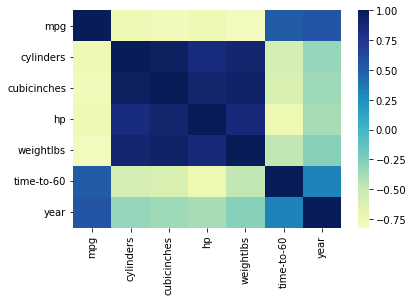

In [22]:
cars_heatmap = sns.heatmap(df.corr(),cmap="YlGnBu", center=0)

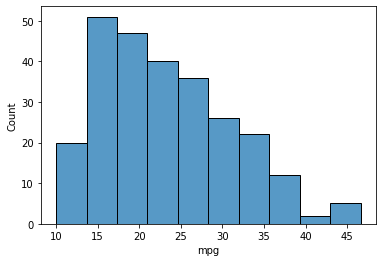

In [23]:
#MilesPerGallon
cars_mpg = sns.histplot(data=df,x='mpg')

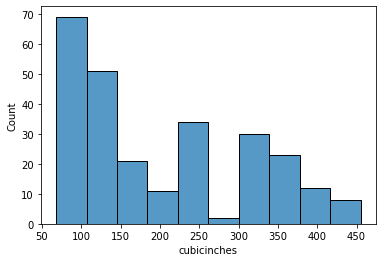

In [24]:
#CubeInches
cars_cubeinches = sns.histplot(data=df,x='cubicinches')

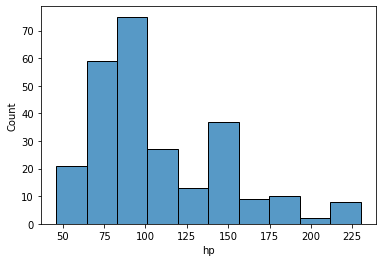

In [25]:
#HorsePower
cars_hp = sns.histplot(data=df,x='hp')

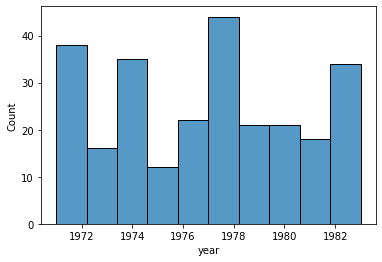

In [26]:
#Years
cars_years = sns.histplot(data=df,x='year')

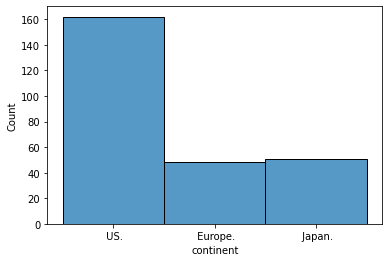

In [27]:
#years
cars_years = sns.histplot(data=df,x='continent')

<AxesSubplot:xlabel='hp', ylabel='weightlbs'>

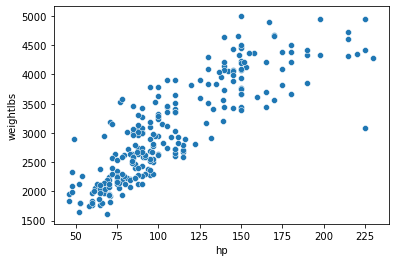

In [29]:
#Scatter hp & weightlbs
sns.scatterplot(data=df,x='hp',y='weightlbs')

In [36]:
continent_list = list(df['continent'].value_counts().keys())
continent_list.append('ALL')
continent_list

[' US.', ' Japan.', ' Europe.', 'ALL']

In [35]:
year_list = list(df['year'].value_counts().keys())
year_list.append('ALL')
year_list

[1974,
 1977,
 1971,
 1976,
 1980,
 1979,
 1978,
 1982,
 1981,
 1983,
 1973,
 1972,
 1975,
 'ALL']

In [ ]:
#streamlit code
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import streamlit as st
import plotly.express as px


#Changing the background with an image that has to be in the same folder
import base64
main_bg = "image_app.jpeg"
main_bg_ext = "jpeg"

side_bg = "image_app.jpeg"
side_bg_ext = "jpeg"

st.markdown(
    f"""
    <style>
    .reportview-container {{
        background: url(data:image/{main_bg_ext};base64,{base64.b64encode(open(main_bg, "rb").read()).decode()});
        background-size: 100% 100%
    }}
   .sidebar.sidebar-content {{
        background: url(data:image/{side_bg_ext};base64,{base64.b64encode(open(side_bg, "rb").read()).decode()});
        background-size: 100% 100%
    }}
    </style>
    
    """,
    unsafe_allow_html=True
)

#Defining the title
st.title("Let's display some stats on cars by continent")

#Openning the DF
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df_full = pd.read_csv(link)

#Building the filtering continent list
continent_list = list(df_full['continent'].value_counts().keys())
continent_list.append('ALL')

#Building the year slider selection
year_list = list(df_full['year'].value_counts().keys())
year_list.append('ALL')

#Defining the selectbox
label1 = "please select the continent you would like to filter"
continent_choosen = st.selectbox(label1,continent_list)

#Asking the user the Price and the Range
# Add a slider to the sidebar:
year_slider = st.sidebar.slider('Reduce the year range if you want to reduce the scope',1971, 1983, (1971,1983))

#Define the validation button
if st.button("Get Cars's statisctics"):
    if continent_choosen != 'ALL':
        continent_condition = df_full['continent'] == continent_choosen
        df1 = df_full[continent_condition]
    else:
        df1 = df_full
    if year_slider != 'ALL':
        year_condition1 = df_full['year'] >= year_slider[0]
        year_condition2 = df_full['year'] <= year_slider[1]
        df2 = df1[year_condition1 & year_condition2]
    else:
        df2=df1
    st.write("You selected cars years between",year_slider,"from this/these continent",continent_choosen)
    st.write(df2)
    cars_heatmap = sns.heatmap(df2.corr(),cmap="YlGnBu", center=0)
    #MilesPerGallon
    cars_mpg = sns.histplot(data=df2,x='mpg')
    #MilesPerGallon
    cars_mpg = sns.histplot(data=df2,x='mpg')
    #CubeInches
    cars_cubeinches = sns.histplot(data=df2,x='cubicinches')
    #HorsePower
    cars_hp = sns.histplot(data=df2,x='hp')
    #Years
    cars_years = sns.histplot(data=df2,x='year')
    #Scatter hp & weightlbs
    sns.scatterplot(data=df2,x='hp',y='weightlbs')
    #Plotting
    st.write()
    with st.expander('Please expand to see the plot'):
        st.title("below the heatmap for the selected cars")
        st.pyplot(fig=cars_heatmap.figure,clear_figure=True)
        st.write()
    
    with st.expander('Please expand to see the plot'):
        import matplotlib.pyplot as plt
        import seaborn as sns
        st.title("Horse Power distribution")
        fig = plt.figure()
        sns.histplot(data=df2,x='hp')
        st.write(fig)

    with st.expander('Please expand to see the plot'):
        import plotly.express as px
        st.title("Time to 60 & Horse Power animated over the years grouped by continent scatter plot")
        fig = px.scatter(df2,
            x=df2["time-to-60"],
            y=df2["hp"],
            color="continent",
            animation_frame="year",
            range_x=[8,25], range_y=[46,230]
        )
        fig.update_layout(
            xaxis_title="Time to 60",
            yaxis_title="Horse Power",
        )

        st.write(fig)
        
    with st.expander('Please expand to see the plot'):
        import plotly.express as px
        st.title("Horse Power by year with continent grouping")
        fig = px.scatter(df2,
            x=df2["year"],
            y=df2["hp"],
            color="continent",
        )
        fig.update_layout(
            xaxis_title="year",
            yaxis_title="Horse Power",
        )

        st.write(fig)
if st.button("Last button to click"):
    st.write("Thank you for checking my streamlit app ;-), Hope you liked it!")
